# Modello di Kuramoto_0:
# $\frac{d \theta _{i} }{dt} = \omega _i + \frac{K}{N}\sum_{j=1}^N A_{ij} \sin (\theta _j - \theta _i ), \ \ i = 1, ..., N$

# Modello di Kuramoto_scale_free:
# $\frac{d \theta _{i} }{dt} = \omega _i + \frac{K}{k_{i}}\sum_{j=1}^N A_{ij} \sin (\theta _j - \theta _i ), \ \ i = 1, ..., N$ 

In [1]:
import igraph as ig
import matplotlib.pyplot as plt
import random
import numpy as np
import copy
%matplotlib widget
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
# It's also possible to use the reduced notation by directly setting font.family:
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})


In [2]:
# function used

def motion(_q_0, _omegas, _K, _t_max, _dt, network):
    debug = False
    # how many vertices (oscillators)?
    _N = len(network.vs.indices)
    q = _q_0
    t = 0
    q_plot = np.zeros((int(_t_max/_dt), _N))
    dq_plot = np.zeros((int(_t_max/_dt), _N))
    dq0 = _omegas
    for t_count in range(int(_t_max/dt)):
        if debug:   print("\n", t)        
        dq = kuramoto(q, _omegas, _K, network, t)
        q_plot[t_count] = q
        dq_plot[t_count] = dq
        if debug: print(dq)
#        q = eulero_esplicito(q, dq, dt)
        q = runge_kutta4(q, dq, dt, t, omegas, _K, network )
        q = q  % (2*np.pi)
        t += _dt
    return q_plot, dq_plot

def eulero_esplicito(q, dq, dt):
    return q + dq*dt

def runge_kutta4(q, dq, h, t, omegas, _K, network):
    f = kuramoto
    k1_dot_q = f(q, omegas, _K, network, t )
    k2_dot_q = f(q + k1_dot_q*h/2, omegas,  _K, network, t + h/2)
    k3_dot_q = f(q + k2_dot_q*h/2, omegas, _K, network, t + h/2)
    k4_dot_q = f(q + k3_dot_q*h, omegas,  _K, network, t + h)
    q = (q + (k1_dot_q + 2*k2_dot_q + 2*k3_dot_q + k4_dot_q)*h/6.0)
    return q

def kuramoto_0(_q, _omegas, _K, network, t):
    _N = len(network.vs.indices)
    _dq = copy.deepcopy(_omegas)
    A_ij = network.get_adjacency()
#    print("prima", _dq)
    for i in range(_N):
        for j in range(_N):
            _dq[i] -= A_ij[i][j] * (_K/_N) * np.sin(_q[i] - _q[j])
#    print("dopo:",_dq)
    return _dq


def kuramoto(_q, _omegas, _K, network, t):
    _N = len(network.vs.indices)
    _dq = copy.deepcopy(_omegas)
    A_ij = network.get_adjacency()
#    print("prima", _dq)
    for i in range(_N):
        for j in range(_N):
            _dq[i] -= A_ij[i][j] * (_K/ ( np.sum(A_ij[i]) + 1) ) * np.sin(_q[i] - _q[j])
#    print("dopo:",_dq)
    return _dq

def kuramoto_1(_q, _omegas, _K, network, t):
    _N = len(network.vs.indices)
    _dq = copy.deepcopy(_omegas)
    A_ij = network.get_adjacency()
#    print("prima", _dq)
    for i in range(_N):
        for j in range(_N):
            _dq[i] -= A_ij[i][j] * _K * np.sin(_q[i] - _q[j])
#    print("dopo:",_dq)
    return _dq

In [3]:
#  initial values
# Set a random seed for reproducibility
N = 20
dt = 0.1
t_max = 10
random.seed(0)
q_0 = np.random.rand(N)*2*np.pi
omegas = np.random.rand(N)
# for plotting
t_span = np.linspace(0, t_max, int(t_max/dt))


Erdos-Renyi: IGRAPH U--- 20 190 --
+ edges:
 0 --  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19   17 --  0  1
2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19
 1 --  0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19   18 --  0  1
2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19
 2 --  0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19   19 --  0  1
2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18
 3 --  0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19
 4 --  0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19
 5 --  0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19
 6 --  0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19
 7 --  0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19
 8 --  0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19
 9 --  0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19
10 --  0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19
11 --  0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19
12 --  0

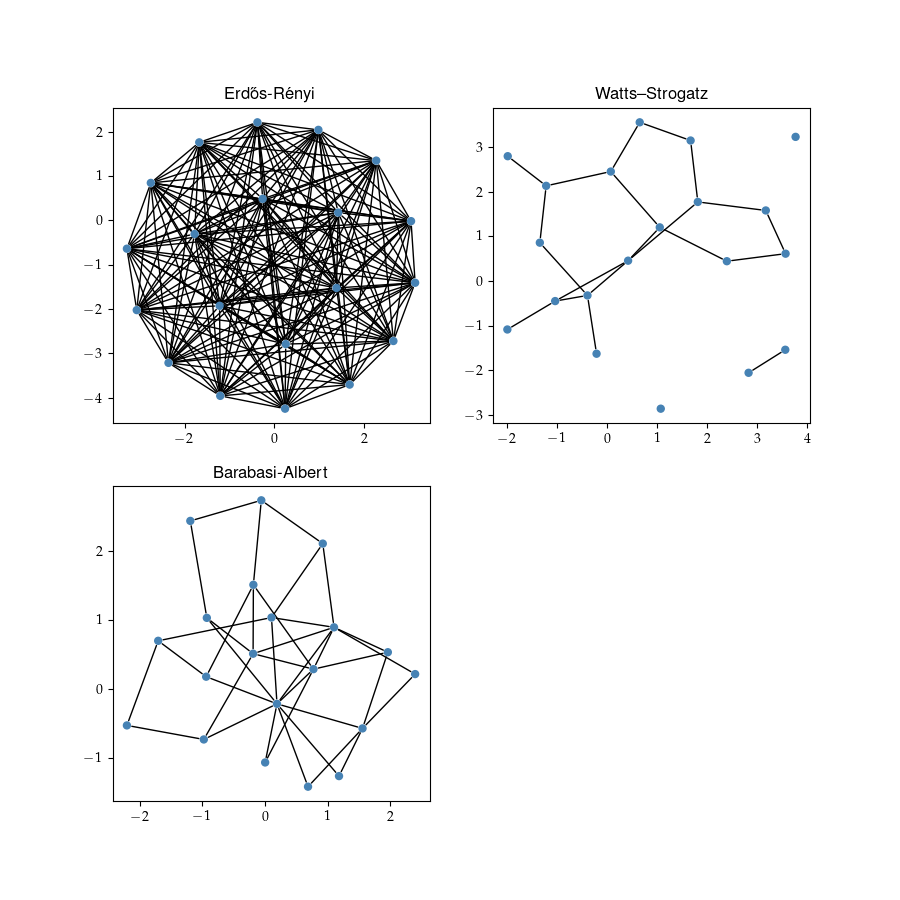

In [45]:
random.seed(0)
name_graph = {1: "Erdős-Rényi", 2: "Watts–Strogatz", 3: "Barabasi-Albert"}
# Generate Erdos Renyi graphs based on probability
g_erdos_renyi = ig.Graph.Erdos_Renyi(n=N, p=1, directed=False, loops=False)
g_watts_strogatz = ig.Graph.Watts_Strogatz(dim = 1, size = 20, nei = 1, p = 0.2)
g_barabasi_albert = ig.Graph.Barabasi(n = N, m = 2 )

# Print out summaries of each graph
print("Erdos-Renyi: {} \n Watts-Strogatz: {} \n Barabasi-Albert: {}".format(
    str(g_erdos_renyi), str(g_barabasi_albert), str(g_watts_strogatz)))


#new figure to plot network graphs
fig_graph = plt.figure(figsize = (9, 9) )
axs_graph = [fig_graph.add_subplot(2,2,1), fig_graph.add_subplot(2,2,2), fig_graph.add_subplot(2,2,3)]
ig.plot(g_erdos_renyi, target=axs_graph[0], color='pink')
ig.plot(g_watts_strogatz, target=axs_graph[1])
ig.plot(g_barabasi_albert, target=axs_graph[2])
for i in range(len(axs_graph)):  
    axs_graph[i].set(title=name_graph[i+1])


In [ ]:
K = 1.4
fig_plot = plt.figure(figsize = (9, 9) )
axs_plot = [fig_plot.add_subplot(2,2,1), fig_plot.add_subplot(2,2,2), fig_plot.add_subplot(2,2,3)]

q_plot_erd_ren, dq_plot_erd_ren = motion(q_0, omegas, K, t_max, dt, g_erdos_renyi)
axs_plot[0].clear()
axs_plot[0].plot(t_span[::], dq_plot_erd_ren[::, 0:20])

q_plot_watt_strog, dq_plot_watt_strog = motion(q_0, omegas, K, t_max, dt, g_watts_strogatz)
axs_plot[1].clear()
axs_plot[1].plot(t_span[::], dq_plot_watt_strog[::, 0:20])

q_plot_barabasi_albert, dq_plot_barabasi_albert = motion(q_0, omegas, K, t_max, dt, g_barabasi_albert)
axs_plot[2].clear()
axs_plot[2].plot(t_span[::], dq_plot_barabasi_albert[::, 0:20])

for i in range(len(axs_plot)):  
    axs_plot[i].set(xlabel="$t (s)$", ylabel=r"$\theta '$", title=name_graph[i+1])

fig_plot_q_t.suptitle("dQ vs t plot", fontsize = 16)

In [ ]:
fig_plot_q_t = plt.figure(figsize = (9, 9) )
axs_plot_q_t = [fig_plot_q_t.add_subplot(2,2,1), fig_plot_q_t.add_subplot(2,2,2), fig_plot_q_t.add_subplot(2,2,3)]

axs_plot_q_t[0].clear()
axs_plot_q_t[0].plot(t_span[::], q_plot_erd_ren[::, 0:20])

axs_plot_q_t[1].clear()
axs_plot_q_t[1].plot(t_span[::], q_plot_watt_strog[::, 0:20])

axs_plot_q_t[2].clear()
axs_plot_q_t[2].plot(t_span[::], q_plot_barabasi_albert[::, 0:20])

for i in range(len(axs_plot_q_t)):  
    axs_plot_q_t[i].set(xlabel="$t (s)$", ylabel=r"$\theta$", title=name_graph[i+1])

fig_plot_q_t.suptitle("Q vs t plot", fontsize = 16)


### studiare il parametro d'ordine r di Kuramoto, in funzione del parametro di controllo K, e fare un plot r(K) vs K dove dovrebbe trovare una curva simile a quella di una transizione di fase (cosa che infatti è, si passa da moto disordinato a moto collettivo).

### fare la stessa simulazione (a parità di rete o di modello di rete) più e più volte, e poi mediare.

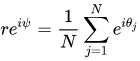

$r, \psi$ parametri d'ordine

nel caso di un network si può definire:

$ r =  \|  \sum_{j = 1}^N \frac{1}{k_j} e^{i \theta _i } \| \ , \ \ i = 1, ..., N$ 

In [51]:
def kuramoto_r(_q, _omegas, network):
    _N = len(network.vs.indices)
    network_connected = np.array(network.get_adjacency().data).sum(axis=1).flatten()
    r = np.abs( np.sum( np.exp(np.cdouble(_q)*1j) / (network_connected + 1)) )
    return r

def kuramoto_r_mean(_q_0, _omegas, _K,_t_max, _dt, network):
    r = 0
    q_plot, dq_plot = motion(_q_0, _omegas, _K, _t_max, _dt, network)
    network_connected = np.array(network.get_adjacency().data).sum(axis=1).flatten()
    r_max_network = np.sum(1/(1 + network_connected))
    for t_count in range(int(_t_max/dt)):
        r += kuramoto_r(q_plot[t_count], _omegas, network)
    #media
    r *= 1./int(t_max/dt)
    #normalizzo rispetto a r_max possibile per il network
    r /= r_max_network
    return r

In [46]:
q_0 = np.random.rand(N)*2*np.pi
omegas = np.random.rand(N)

K_start = 0
K_end = 100
K_step = 4
K_cycle = np.arange(K_start, K_end, K_step)

r_mean_erdos_renyi = []
for K in K_cycle:
    r = kuramoto_r_mean(q_0, omegas, K, t_max, dt, g_erdos_renyi)
    r_mean_erdos_renyi.append(r)
    print("K: {} - r_mean/K: {}".format(K, r))


1.0000000000000002
K: 0 - r_mean/K: 0.37712621115806766
1.0000000000000002
K: 4 - r_mean/K: 0.9445994875333009
1.0000000000000002
K: 8 - r_mean/K: 0.9684800194087226
1.0000000000000002
K: 12 - r_mean/K: 0.976946691239715
1.0000000000000002
K: 16 - r_mean/K: 0.9812653741634757
1.0000000000000002
K: 20 - r_mean/K: 0.9838423993080838
1.0000000000000002
K: 24 - r_mean/K: 0.9854911423083399
1.0000000000000002
K: 28 - r_mean/K: 0.9857001938605856
1.0000000000000002
K: 32 - r_mean/K: 0.9785074913462077
1.0000000000000002
K: 36 - r_mean/K: 0.9811375335059902
1.0000000000000002
K: 40 - r_mean/K: 0.9722584231950961
1.0000000000000002
K: 44 - r_mean/K: 0.8056654998138888
1.0000000000000002
K: 48 - r_mean/K: 0.8549935410414383
1.0000000000000002
K: 52 - r_mean/K: 0.69360803334989
1.0000000000000002
K: 56 - r_mean/K: 0.7057425914920203
1.0000000000000002
K: 60 - r_mean/K: 0.5241284006023796
1.0000000000000002
K: 64 - r_mean/K: 0.6190485965911378
1.0000000000000002
K: 68 - r_mean/K: 0.58247823245322

In [44]:
r_mean_watts_strogatz = []
for K in K_cycle:
    r = kuramoto_r_mean(q_0, omegas, K, t_max, dt, g_watts_strogatz)
    r_mean_watts_strogatz.append(r)
    print("K: {} - r_mean/K: {}".format(K, r))

6.916666666666666
K: 0 - r_mean/K: 0.23811903308463514
6.916666666666666
K: 4 - r_mean/K: 0.7198454218512673
6.916666666666666
K: 8 - r_mean/K: 0.8100032867013036
6.916666666666666
K: 12 - r_mean/K: 0.8576945470853853
6.916666666666666
K: 16 - r_mean/K: 0.887587906787497
6.916666666666666
K: 20 - r_mean/K: 0.9077458434527407
6.916666666666666
K: 24 - r_mean/K: 0.9105605542671287
6.916666666666666
K: 28 - r_mean/K: 0.9164760249357204
6.916666666666666
K: 32 - r_mean/K: 0.9139217270418437
6.916666666666666
K: 36 - r_mean/K: 0.6928937130298188
6.916666666666666
K: 40 - r_mean/K: 0.3573869520359596
6.916666666666666
K: 44 - r_mean/K: 0.29353504253628276
6.916666666666666
K: 48 - r_mean/K: 0.3266538578497477
6.916666666666666
K: 52 - r_mean/K: 0.27762718186333174
6.916666666666666
K: 56 - r_mean/K: 0.2558311155555862
6.916666666666666
K: 60 - r_mean/K: 0.2533824387013722
6.916666666666666
K: 64 - r_mean/K: 0.25039074456378324
6.916666666666666
K: 68 - r_mean/K: 0.25262034917577614
6.9166666

In [50]:
q_0 = np.random.rand(N)*2*np.pi
omegas = np.random.rand(N)
r_mean_barabasi_albert = []
for K in K_cycle:
    r = kuramoto_r_mean(q_0, omegas, K, t_max, dt, g_barabasi_albert)
    r_mean_barabasi_albert.append(r)
    print("K: {} - r_mean/K: {}".format(K, r))

4.842099567099567
K: 0 - r_mean/K: 0.18865410910573593
4.842099567099567
K: 4 - r_mean/K: 0.8677635665367596
4.842099567099567
K: 8 - r_mean/K: 0.9312189454195675
4.842099567099567
K: 12 - r_mean/K: 0.958984034421341
4.842099567099567
K: 16 - r_mean/K: 0.969497407904707
4.842099567099567
K: 20 - r_mean/K: 0.9750331839960675
4.842099567099567
K: 24 - r_mean/K: 0.9714955014464
4.842099567099567
K: 28 - r_mean/K: 0.9750747472728494
4.842099567099567
K: 32 - r_mean/K: 0.9598147981132585
4.842099567099567
K: 36 - r_mean/K: 0.869113051549837
4.842099567099567
K: 40 - r_mean/K: 0.8142197730038386
4.842099567099567
K: 44 - r_mean/K: 0.7073707865050196
4.842099567099567
K: 48 - r_mean/K: 0.58209418287283
4.842099567099567
K: 52 - r_mean/K: 0.5284316323776298
4.842099567099567
K: 56 - r_mean/K: 0.43249251573424563
4.842099567099567
K: 60 - r_mean/K: 0.3660205737014854
4.842099567099567
K: 64 - r_mean/K: 0.36144176884181334
4.842099567099567
K: 68 - r_mean/K: 0.349914817387147
4.842099567099567
K

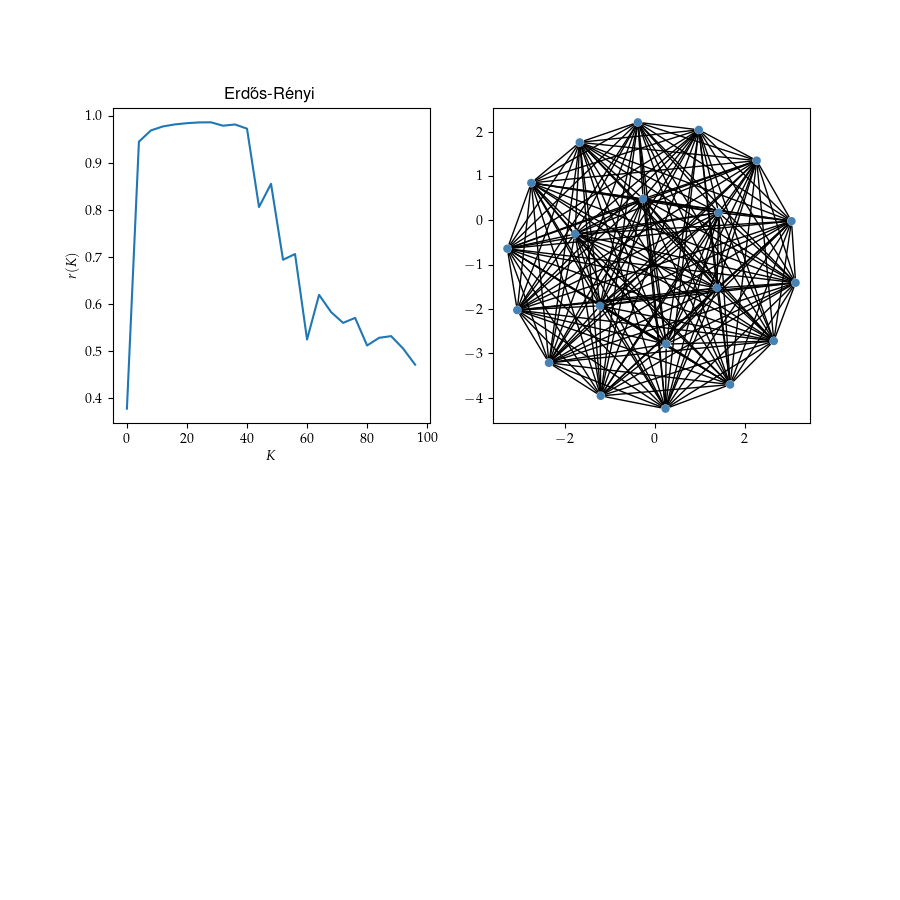

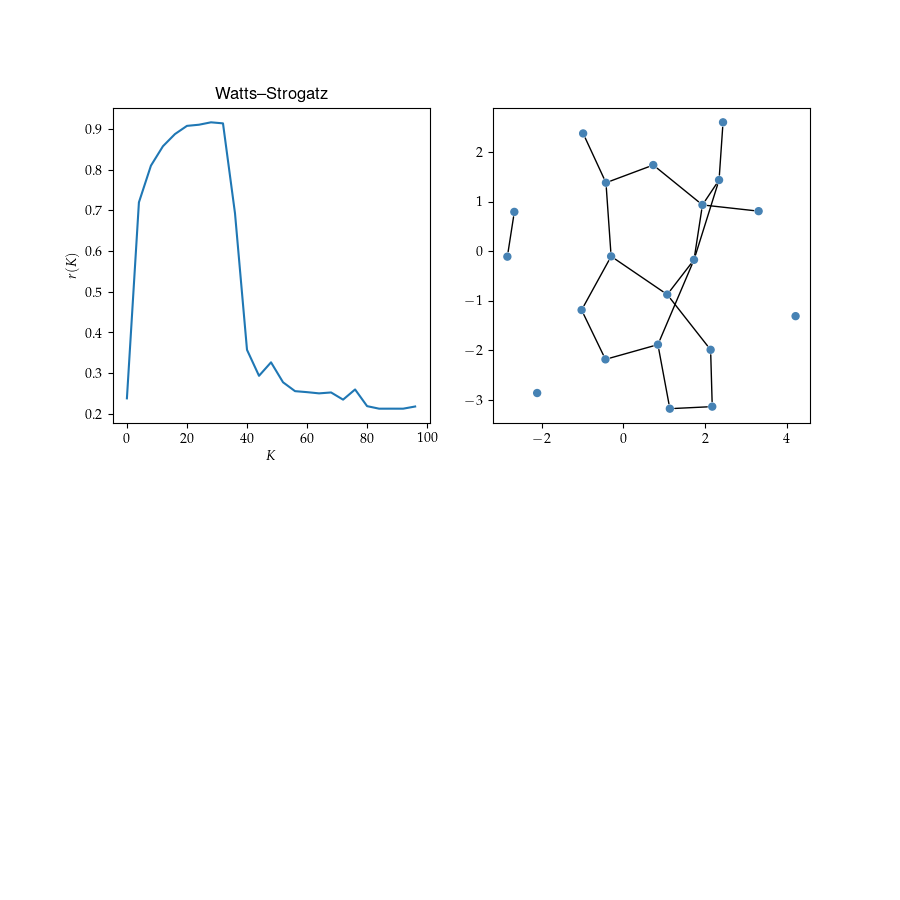

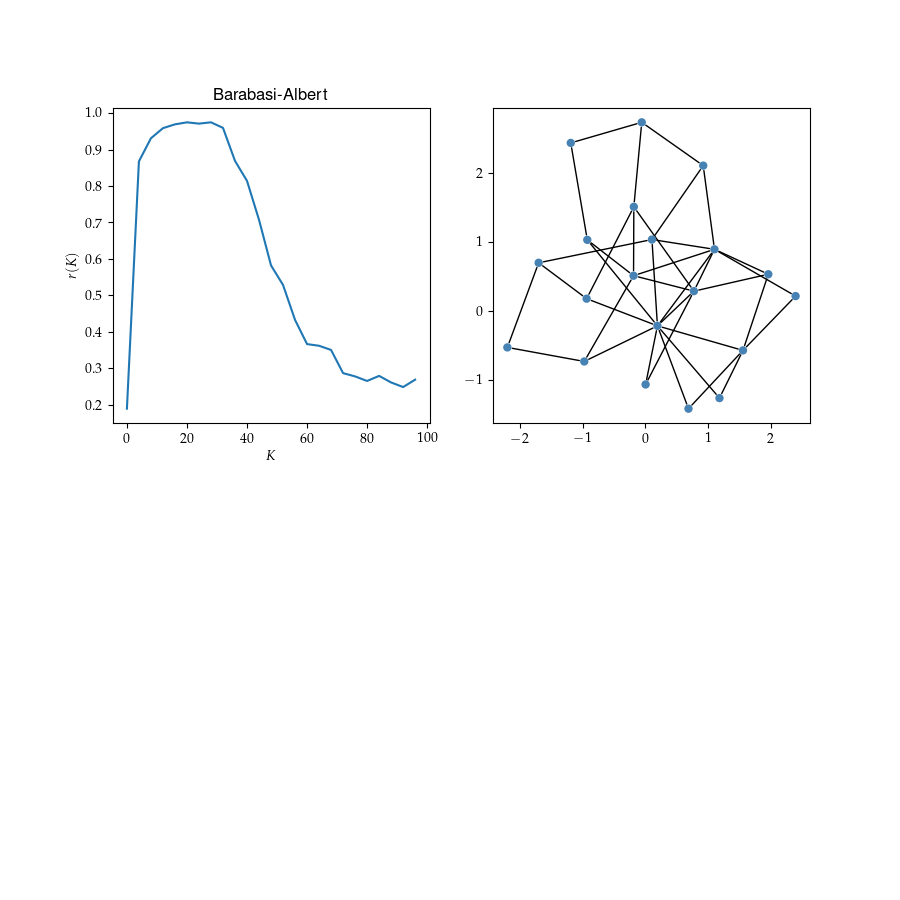

In [57]:
plt.close

fig_plot_r_erdos_renyi = plt.figure(figsize = (9, 9) )
axs_plot_r_erdos_renyi = [fig_plot_r_erdos_renyi.add_subplot(2,2,1), fig_plot_r_erdos_renyi.add_subplot(2,2,2)]
axs_plot_r_erdos_renyi[0].clear()
axs_plot_r_erdos_renyi[0].plot(K_cycle[::], r_mean_erdos_renyi)
axs_plot_r_erdos_renyi[0].set(xlabel="$K$", ylabel=r"$r (K)$", title=name_graph[1])


fig_plot_r_watts_strogatz = plt.figure(figsize = (9, 9) )
axs_plot_r_watts_strogatz = [fig_plot_r_watts_strogatz.add_subplot(2,2,1), fig_plot_r_watts_strogatz.add_subplot(2,2,2)]
axs_plot_r_watts_strogatz[0].clear()
axs_plot_r_watts_strogatz[0].plot(K_cycle[::], r_mean_watts_strogatz)
axs_plot_r_watts_strogatz[0].set(xlabel="$K$", ylabel=r"$r (K)$", title=name_graph[2])

fig_plot_r_barabasi_albert = plt.figure(figsize = (9, 9) )
axs_plot_r_barabasi_albert = [fig_plot_r_barabasi_albert.add_subplot(2,2,1), fig_plot_r_barabasi_albert.add_subplot(2,2,2)]
axs_plot_r_barabasi_albert[0].clear()
axs_plot_r_barabasi_albert[0].plot(K_cycle[::], r_mean_barabasi_albert)
axs_plot_r_barabasi_albert[0].set(xlabel="$K$", ylabel=r"$r (K)$", title=name_graph[3])

ig.plot(g_erdos_renyi, target=axs_plot_r_erdos_renyi[1], color='pink')
ig.plot(g_watts_strogatz, target=axs_plot_r_watts_strogatz[1])
ig.plot(g_barabasi_albert, target=axs_plot_r_barabasi_albert[1])

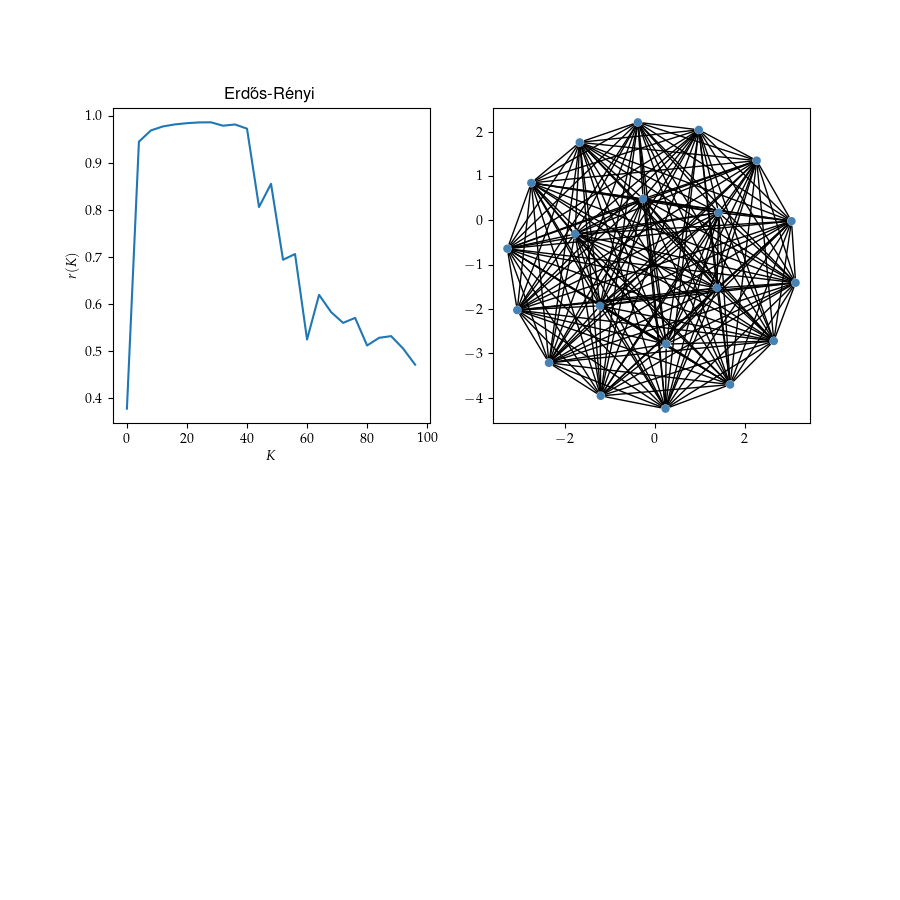

In [60]:
fig_plot_r_erdos_renyi.show()

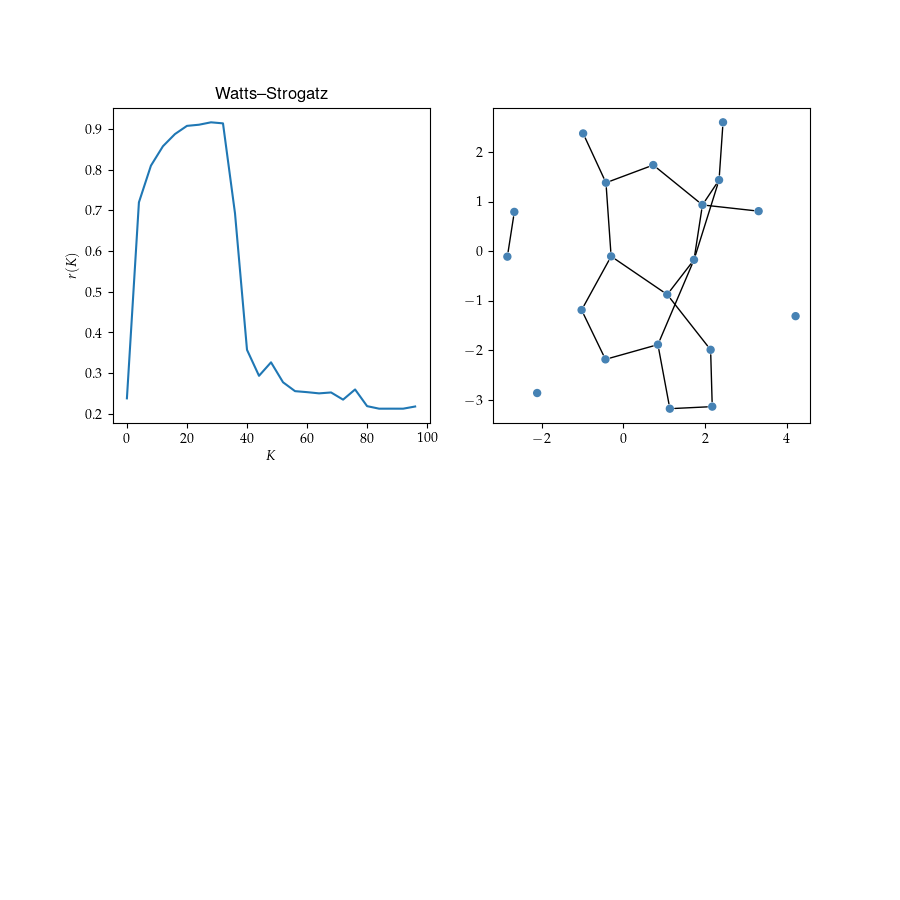

In [59]:
fig_plot_r_watts_strogatz.show()

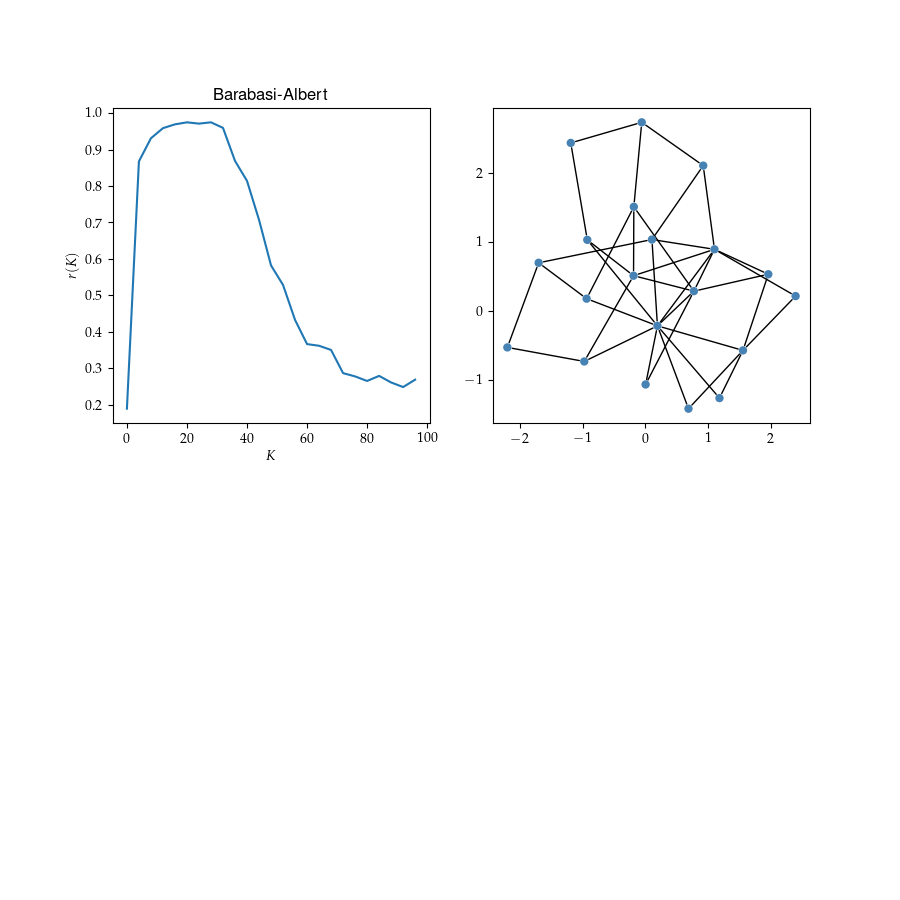

In [58]:
fig_plot_r_barabasi_albert.show()